In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('task/dataset/train.tsv', sep='\t')
df.head()

,title,is_fake
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1
1,Агент Кокорина назвал езду по встречке житейск...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело о недоносительст...,1


In [4]:
df.shape

(5758, 2)

In [5]:
df.describe()

,is_fake
count,5758.000000
mean,0.500000
std,0.500043
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [6]:
texts = df['title'].values
target = df['is_fake'].values
df[50::300]

,title,is_fake
50,Fox начала работу над экранизацией Вольтрона,0
350,Локомотив выиграл Кубок России,0
650,Несовершеннолетним запретят пользоваться интер...,1
950,За пятого ребёнка многодетные родители получат...,1
1250,СМИ назвали новый клуб баскетболиста Мозгова,0
1550,Болт включен в состав сборной Ямайки на москов...,0
1850,Украинский боксер Усик победил россиянина Князева,0
2150,Dell отказалась от смартфонов,0
2450,Моргенштерн сыграет Кыш Бабая в сериале Булата...,1
2750,Тимошенко преодолела топливный кризис,0


<AxesSubplot:>

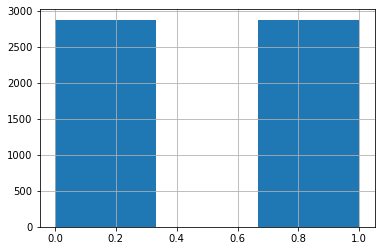

In [7]:
df['is_fake'].hist(bins=3)

In [8]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, y_train, y_test = train_test_split(texts, target, test_size=0.3, random_state=118)

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
tfidf_trans = TfidfTransformer(use_idf=True)
count_vect = CountVectorizer()

X_train_bow = count_vect.fit_transform(texts)
X_train_tfidf = tfidf_trans.fit_transform(X_train_bow)

df = pd.DataFrame(X_train_tfidf[0].T.todense(), index=count_vect.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df.head(10)

,TF-IDF
москвичу,0.378617
клутину,0.378617
вмешательство,0.378617
пришёл,0.378617
владимиру,0.349344
счёт,0.320072
выборы,0.320072
американские,0.283542
за,0.138809
превратит,0.000000


In [12]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, target)

In [13]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

In [14]:
text_clf = text_clf.fit(texts_train, y_train)

In [15]:
predicted = text_clf.predict(texts_test)
np.mean(predicted == y_test)

0.8420138888888888

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                                   alpha=1e-3, max_iter=500, random_state=118)),
])                                       

In [18]:
_ = text_clf_svm.fit(texts_train, y_train)

In [19]:
predicted_svm = text_clf_svm.predict(texts_test)
np.mean(predicted_svm == y_test)

0.7783564814814815